# Retail Marketing Data Analysis

## Domain: Marketing, Retail

## Problem Statment:
You're a marketing analyst and you've been told by the Senior Marketing Manager that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set in order to understand this problem and propose data-driven solutions.

## Data Description.
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company's web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company's web site in the last month
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer's location

## 1. Importing libraries and loading dataset


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# loading dataset
df = pd.read_csv("marketing_data.csv")
df.sample(5) #Random 5 samples from the dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
998,10341,1948,Graduation,Together,"$51,315.00",0,0,2/23/14,45,68,...,5,2,0,0,0,0,0,0,0,AUS
35,7962,1987,PhD,Single,"$95,169.00",0,0,10/9/13,1,1285,...,4,1,0,0,1,1,0,1,0,SP
1037,10092,1954,Graduation,Divorced,"$70,044.00",0,1,2/18/13,46,1073,...,5,5,0,0,0,0,0,0,0,SP
2104,6988,1986,Graduation,Married,"$71,952.00",1,0,1/10/13,93,656,...,8,4,1,0,1,0,0,0,0,AUS
908,1055,1976,Master,Married,"$53,204.00",1,1,3/20/14,40,29,...,3,4,0,0,0,0,0,0,0,GER


## Information and findings on the dataset


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

- The given data has 2240 rows and 28 columns.
- Only one column 'Income' has null values which are 24 in no.
- Most of the columns have int data type with a few object type columns.

## 2. Statistical description of the dataset


In [10]:
df.describe().transpose() # shows the statistical description of numeric data columns

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


Taking the example of 'MntWines' column showing amount spent on wines:
- i) Spread and variation in data:
     - The spread of data can simply be checked with the 'range' of data
        - Range = max - min = 1493 - 0 = 1493
     - The variation is shown by the standard deviation. More the std. deviation, more spread out the data is from the             mean. MntWines has high std deviation(336.59) which justifies its large range.
- ii) Middle 50% of the data:
  - Middle 50% of data lies in the IQR(Inter Quartile Range)    
  - IQR = Q3 - Q1 = 504.25-23.75 = 480.5 
- iii) Boundaries for lower, middle and upper quarters of data:
  - Lower quarter ranges from min(0.0) to Q1(23.75)
  - 2 middle quarters range from Q1(23.75) to median(Q2=173.5) and median to Q3(504.25) 
  - Upper quarter ranges from Q3(504.25) to max(1493)

In [11]:
df.describe(include='O') # Gives description of the non-numeric data columns

,Education,Marital_Status,Income,Dt_Customer,Country
count,2240,2240,2216,2240,2240
unique,5,8,1974,663,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1127,864,12,12,1095


## 3. Handeling missing values in the dataset

In [12]:
df.isnull().sum() # gives missing values in all columns

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

- So there are 24 missing values in 'Income' column of the dataset
- To impute these missing values we first need to convert the 'Income' column into numeric data type

In [13]:
# Converting 'Income' into numeric data type(float)

df[' Income '] = df[' Income '].str.replace('$','') #Removing unwanted characters
df[' Income '] = df[' Income '].str.replace(',','')
df[' Income '] = df[' Income '].str.replace(' ','')

df.loc[df[' Income '].notnull(), ' Income '] = df.loc[df[' Income '].notnull(), ' Income '].astype(float)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [14]:
df[' Income '] = df[' Income '].astype(float)

<AxesSubplot:xlabel=' Income '>

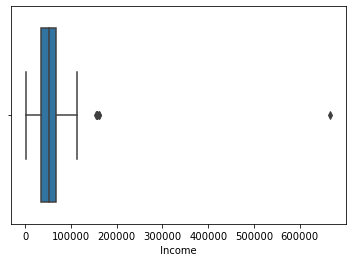

In [15]:
sns.boxplot(df[' Income '])

Since we can see outliers in the 'income' data therefore it will best to use median for imputing missing values in this column, as mean is heavily affected by outliers.

In [16]:
df[' Income '] = df[' Income '].fillna(df[' Income '].median())

In [17]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
 Income                0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Thus the missing values have been properly handled.

## 4. Cleaning data for any special characters and changing to appropriate data type


In [18]:
# Only the ' Income ' variable needed cleaning of special characters and data type change which we have already done in the previous cell.

## 5. Age of the customers


In [19]:
df['Age'] = 2022 - df['Year_Birth']
df['Age'].head()

0    52
1    61
2    64
3    55
4    33
Name: Age, dtype: int64

In [20]:
# Statistical summary of 'Age'
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

So the age of customers varies from 26 to 129 with median being 52.

## 6. Total amount spent on various products

In [21]:
# a. Total amount spent by each customer
df['Total_Amount'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Total_Amount']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Amount, Length: 2240, dtype: int64

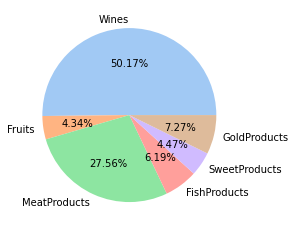

In [22]:
# b. Percentage amount spent on each product
Ttl_spent = [df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(), df['MntFishProducts'].sum(), df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
Keys = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProducts']
colors = sns.color_palette('pastel')
plt.pie(Ttl_spent, labels=Keys, colors=colors, autopct='%.2f%%')
plt.show()

The pie chart shows that maximum amount spent by customers is on wines followed by meat products.

## 7. Total purchases made through different channels

In [23]:
# a. Total Purchase by each customer
df['Total_Purchase'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['Total_Purchase'].head()

0    14
1    17
2    10
3     3
4     6
Name: Total_Purchase, dtype: int64

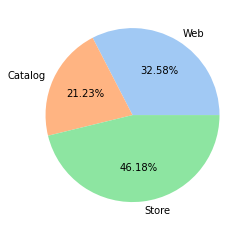

In [24]:
# b. Different channels' contribution to total purchases
Ttl_Purchase = [df['NumWebPurchases'].sum(), df['NumCatalogPurchases'].sum(), df['NumStorePurchases'].sum()]
Keys = ['Web', 'Catalog', 'Store']
colors = sns.color_palette('pastel')
plt.pie(Ttl_Purchase, labels=Keys, autopct = '%.2f%%', colors=colors)
plt.show()

- The above pie chart shows the contribution done by the 3 channels individually in the total purchase done by all the customers.
- It shows the maximum contribution is done through Store Purchases

## 8. To find out the most successful marketing campaign


In [25]:
cmp = df.filter(regex='Cmp').sum()
cmp

AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

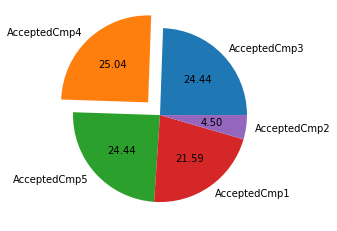

In [41]:
plt.pie(cmp,autopct='%0.2f',labels=cmp.index,explode=[0,0.2,0,0,0])
plt.show()

#### Most Successful Campaign:
- Campaign 4 has been the most successful with a small margin followed by Campaign 3 and 5.
- Also the second campaign, ie. 'AcceptecCmp2' is the least performing campaign.

## 9. Performance of different products in terms of revenue generated



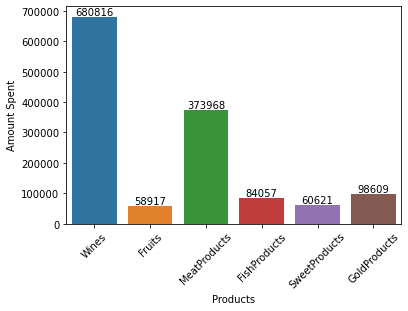

In [28]:
Ttl_spent = [df['MntWines'].sum(), df['MntFruits'].sum(), df['MntMeatProducts'].sum(), df['MntFishProducts'].sum(), df['MntSweetProducts'].sum(), df['MntGoldProds'].sum()]
Keys = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProducts']
ax = sns.barplot(x=Keys, y=Ttl_spent)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.set_xlabel("Products")
ax.set_ylabel("Amount Spent")
plt.show()

- The barplot above shows exceptionally high revenue geneated by wines and then meat products, the highest performing product being wines.
- While fruits are the lowest performing in terms of revenue generation

## 10. To establish relation between Age of customer and last campaign acceptance rate


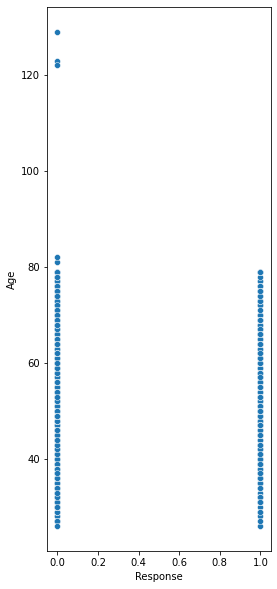

In [29]:
fig, ax = plt.subplots(figsize=(4, 10))
sns.scatterplot(data=df, x='Response', y='Age', ax=ax)
plt.show()

- We can see that customers too old(above age 80) did not accept any offer in the last campaign.
- But for customers below 80 years of age there is no relation between the customer's acceptance for offer in the last campaign and the age of the customer.

## 11. Relation between 'customers who accepted the last campaign' and 'their country'

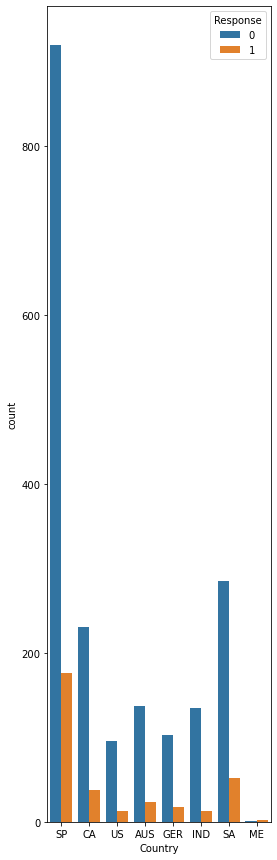

In [30]:
fig, ax = plt.subplots(figsize=(4, 15))
sns.countplot(x='Country', hue='Response', data=df, ax=ax) # Response=1 shows customer accepted the offer in last campaign
plt.show()

The above countplot shows:
- 'SP' is the country with maximum customers who accepted the last campaign
- 'ME' is the country with minimum customers who accepted the last campaign

## 12. i) Relation between 'total amount spent' and 'total number of dependents'


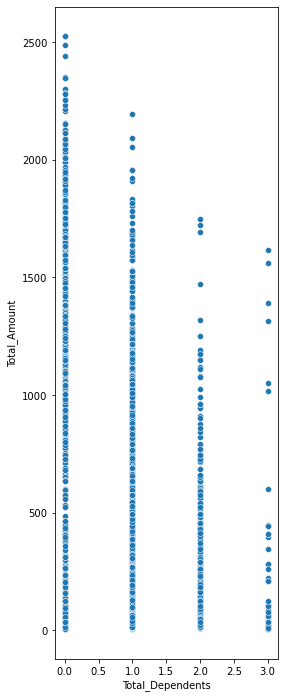

In [31]:
fig, ax = plt.subplots(figsize=(4,12))
df['Total_Dependents'] = df['Kidhome'] + df['Teenhome']
sns.scatterplot(data=df, x='Total_Dependents', y='Total_Amount', ax=ax)
plt.show()

- Customers with zero dependents are almost uniformly distributed across the amount axis, ie. there are all kinds expenditure in this type, from low to medium to as high as 2500 units of total expenditures.
- As the number of dependents increase, the average total amount spent starts to decline
- There are only few customers spending above 1200 units in case of 2 dependents
- While customers with 3 dependents are mostly aggregated below 500 units of total expenditures

## 12. ii) Relation between 'Total Purchases' and 'total number of dependents'


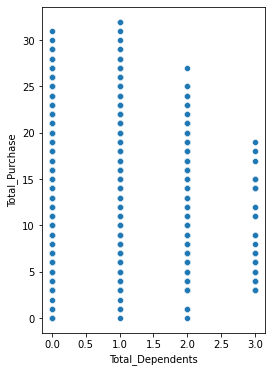

In [32]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.scatterplot(data=df, x='Total_Dependents', y='Total_Purchase', ax=ax)
plt.show()

- Customers with zero or single dependent have higher average for total purchases, maximum upto around 32 units
- As the number of dependents increase, average total purchase decrease
- Customers with 3 dependents have total purchase below 20 units

## 13. Correlation Analysis and Visualisation


In [33]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_Amount,Total_Purchase,Total_Dependents
ID,1.000000,0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.025387,-0.007517,-0.021614,-0.015061,-0.021968,0.033883,-0.000028,-0.018054,-0.015428,-0.000146
Year_Birth,0.000028,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.060510,0.007123,-0.005930,-0.006539,0.021325,-0.030128,-1.000000,-0.111306,-0.162999,-0.090199
Income,0.012996,-0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,0.182718,0.334893,0.274891,0.087581,0.132867,-0.027187,0.160899,0.664775,0.622386,-0.290858
Kidhome,0.002406,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,-0.161600,-0.205634,-0.172339,-0.081716,-0.080008,0.040207,-0.230176,-0.556669,-0.568637,0.689971
Teenhome,-0.002580,-0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.038886,-0.191050,-0.140090,-0.015605,-0.154446,0.003138,0.352111,-0.138384,0.037902,0.698433
Recency,-0.046524,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,0.018826,0.000129,-0.019283,-0.001781,-0.198437,0.013231,0.019871,0.020433,0.006410,0.018053
MntWines,-0.022878,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.373286,0.472613,0.354133,0.205907,0.247254,-0.039007,0.157773,0.891839,0.756490,-0.351909
MntFruits,0.004600,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,0.010152,0.215833,0.194748,-0.009773,0.125289,-0.005166,0.017917,0.614229,0.520686,-0.394853
MntMeatProducts,-0.004437,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,0.102912,0.373769,0.309761,0.043033,0.236335,-0.023483,0.030872,0.842965,0.623315,-0.502208
MntFishProducts,-0.024475,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,0.016843,0.199578,0.260762,0.002577,0.111331,-0.020953,0.041625,0.642818,0.537538,-0.425503


The above correlation matrix gives pairwise correlation of all variables in the dataframe

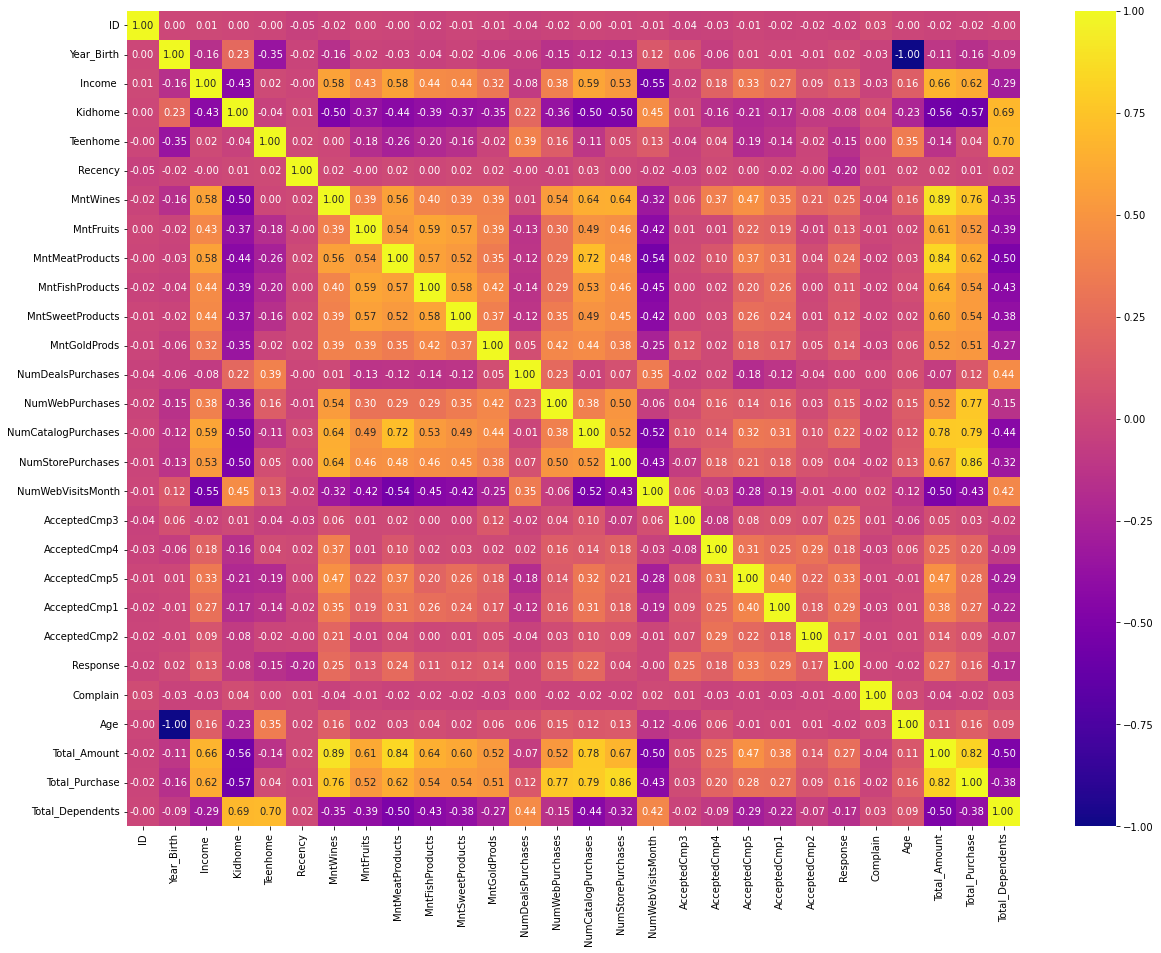

In [34]:
# Visualisation of the correlation matrix using Heatmap
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='plasma', fmt='.2f')
plt.show()

From above heatmap we can get the following inferences:

- Boxes with bright yellow color have high positive correlation coefficient, which means they have strong direct           relationship, ie. one variable increases or decreases with increase or decrease in other variable respectively.
  - eg. 'Total_Amount' and 'MntWines' have correlation coefficient of 0.89 so with increase in MntWines, Total_Amount also 
    increases, if other variables do not change as much.
  - Similarly, 'Income' has some positive correlation with 'amount spent on products' and 'purchases made through different channels'
  
- Boxes with dark purple color have high negative correlation coefficient, which means they have strong indirect relationship, ie. one variable decreases or increases with increase or decrease in other variable respectively.
  - eg. 'Year_Birth' and 'Age' have maximum correlation coefficient of -1, so with increase in 'Year_Birth', 'Age' decreases.
  - Similarly 'no. of web visits per month' and 'total dependents' have some neagative correlation with the 'amount spent on various products'
  
- Boxes with light pink/light purple color have very low value of correlation coefficient which means change in one variable has negligible effect on another variable.
  - eg. 'Income' has almost zero correlation with 'Recency'
  - Also, 'age' and 'complaints made' have very light relationship with 'amount spent', 'purchases made' and 'offer acceptance rate at various campaigns' 

## 14. Education background of complainers


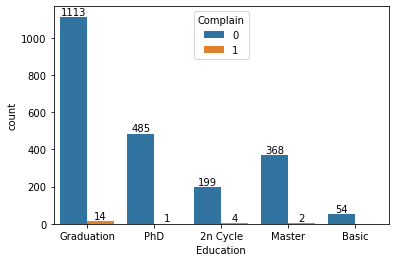

In [35]:
ax = sns.countplot(x='Education', hue='Complain', data=df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

- The above countplot shows that the the education of the customers who registered maximum complaints(14) is 'Graduation'
- Least number of complaints(0) is done by customers with 'Basic' education

## 15. Pairplot of variables 'Total_Amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
## i) With hue as Response

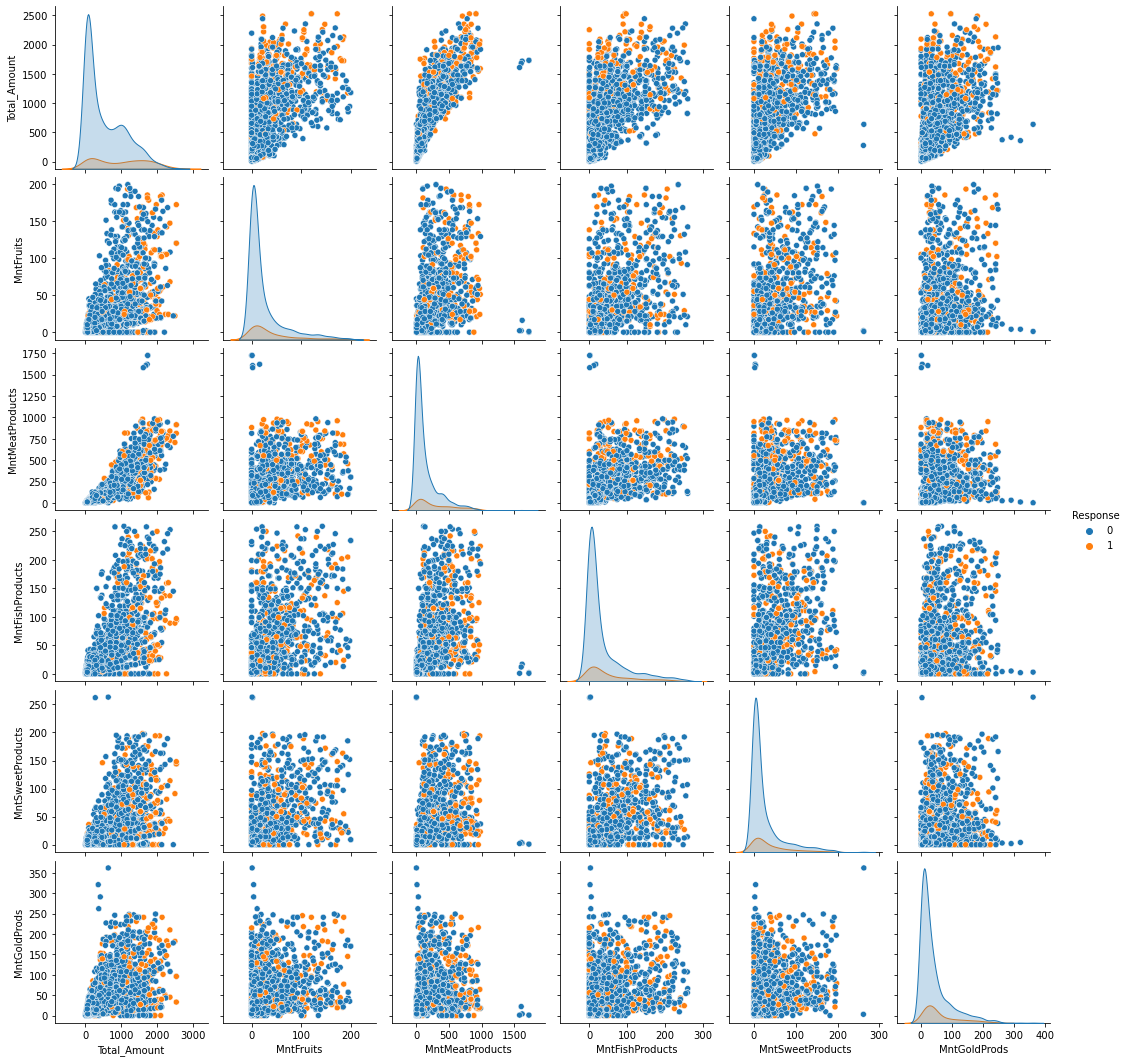

In [36]:
sns.pairplot(data=df, vars=['Total_Amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], hue='Response')
plt.show()

Inferences:
- So a pairplot shows relationship between multiple variables, taking 2 at a time.
- The diagonal of the pairplot shows KDE(Kernel Density Estimate) of the variables.
- Inferences from the above pairplot:
  - There's some amount of rough linear relationship between 'total amount' and 'various products' as inferred from the first row of the pairplot
  - From second row, we see that there aint a significant relationship between 'amount spent on fruits' and 'that spent on other products'
  - From the third row, 'meat products' have rough linear relation with 'total amount' but not any relation with other products. Also customers spending high amounts on meat products are have spent quite low on other products like fruits, fish, sweet and gold products and these customers didnt accept any offers in the last campaign
  - Similarly 'sweet products' have no relation with other products, with very few customers who spent high on sweets and low on other products.
  - Gold amount also has no relation with other products but people spending exceptionally high on gold spent negligibly on other products and were those who didnt accept any offers in the last campaign
- Now, the kde plots are all right skewed and show that most customer spent total amount of 80 units and then some spent around 1000 units
- The amount spent by most of the customers on fruits, sweets, fish, gold and meat products is around respectively 10, 10, 10, 20 and 50 units.

## ii) With hue as Education


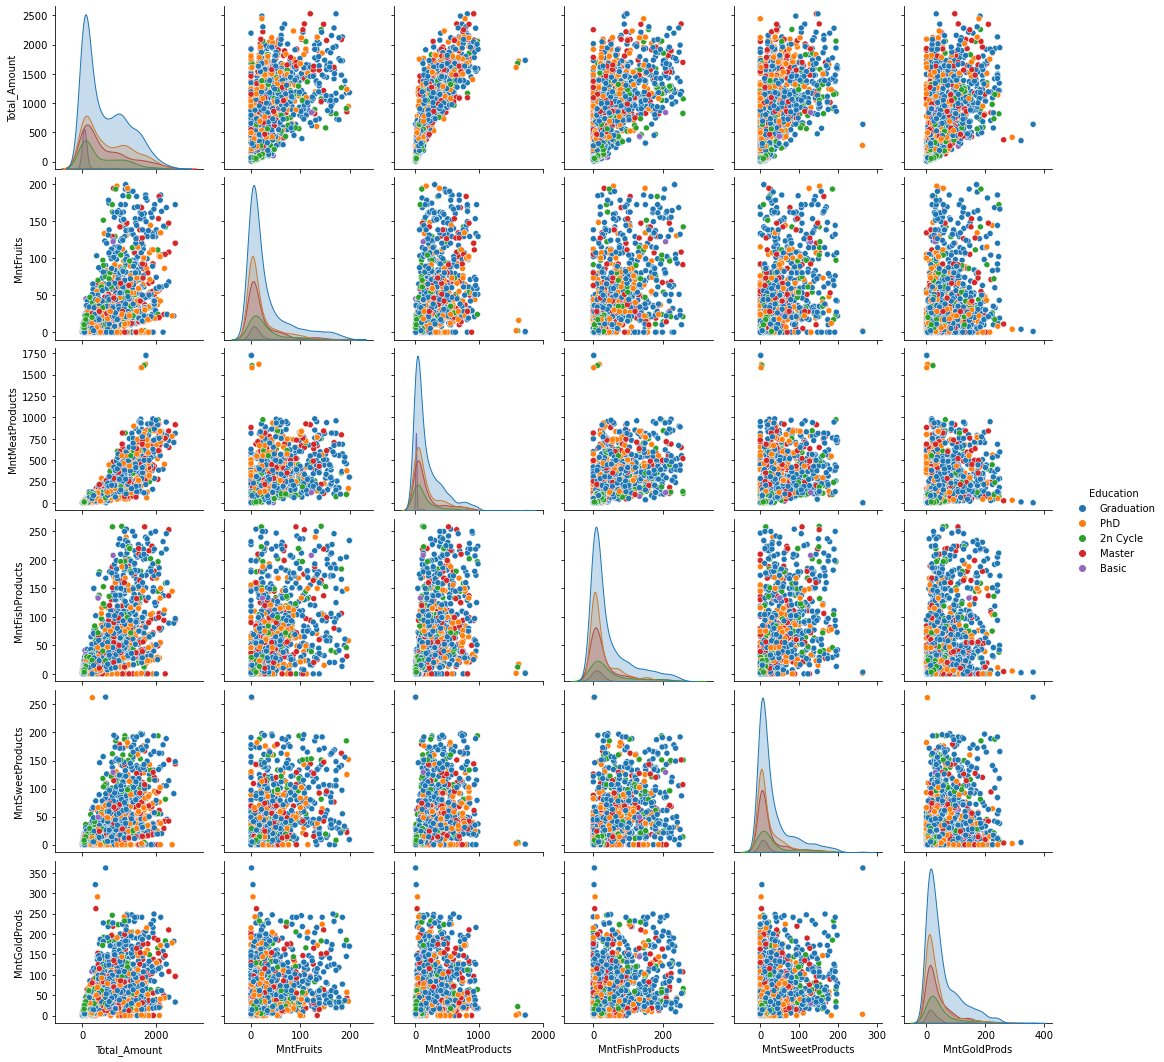

In [37]:
sns.pairplot(data=df, vars=['Total_Amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], hue='Education')
plt.show()

Inferences:
- So the relation between amount spent on various products is already explained above, but according to hue 'Education' we can see that there are no groupings of various education types.
- We can also see that people spending highest on meat and sweet products generally belong to 'graduation' or 'phd' category
- People spending highest on gold products are mostly of graduation.

## iii) With hue as Marital Status


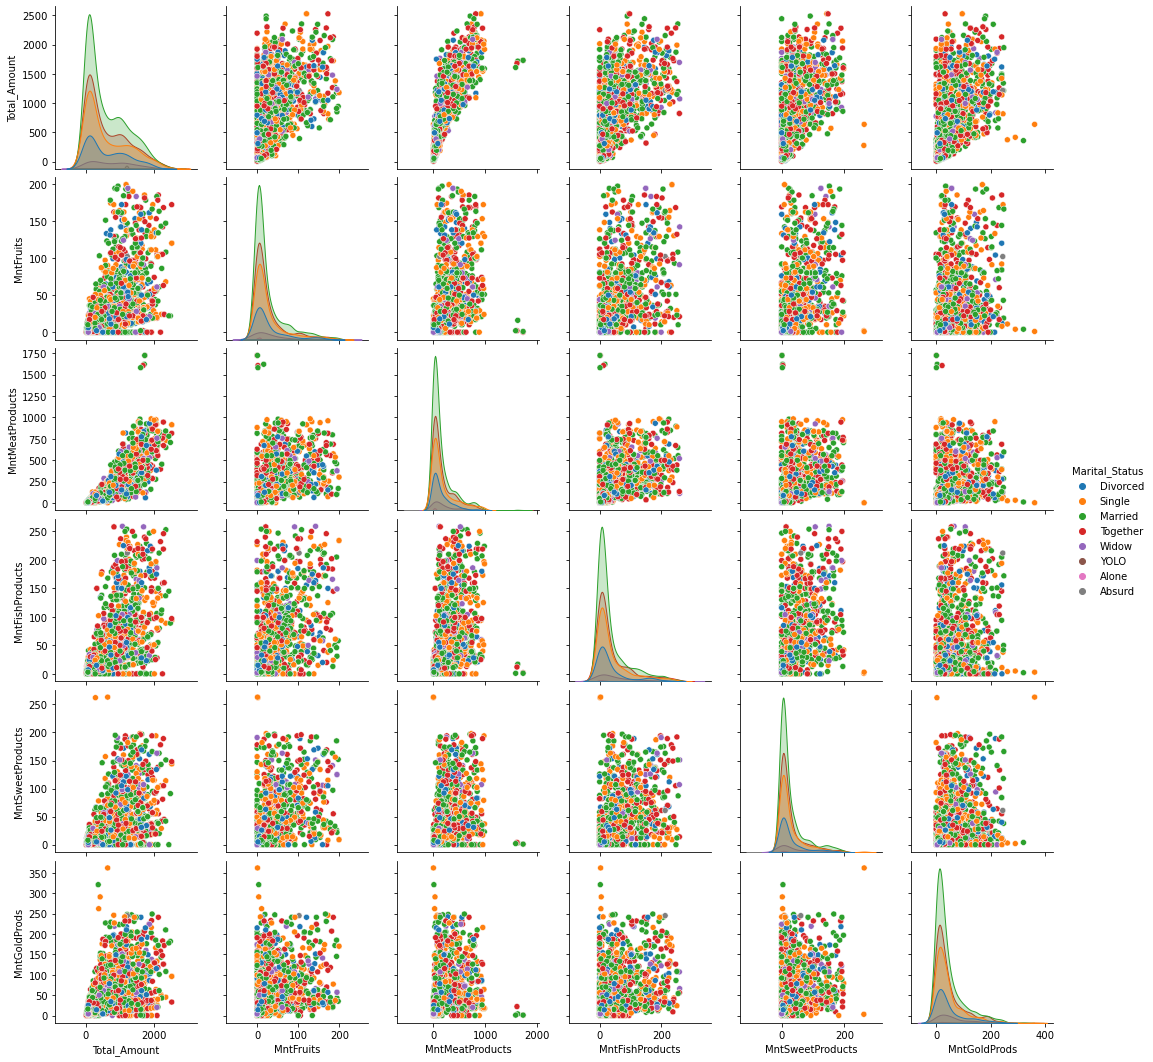

In [38]:
sns.pairplot(data=df, vars=['Total_Amount', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], hue='Marital_Status')
plt.show()

Inferences:
- Here again we cant see any special groupings of hue 'marital status' in any of the product categories.
- But people spending high on meat products are generally married or together.
- People spending the highest on sweets are single
- People spending high on gold are single or married